In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kieranpoc/steam-reviews")

print("Path to dataset files:", path)

Path to dataset files: /home/abuzmander/.cache/kagglehub/datasets/kieranpoc/steam-reviews/versions/2


In [3]:
# Creates our data frame
df = pd.read_csv("/home/abuzmander/.cache/kagglehub/datasets/kieranpoc/steam-reviews/versions/2/weighted_score_above_08.csv", low_memory=False)

In [4]:
df.head()

,recommendationid,appid,game,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,...,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,147449116,10,Counter-Strike,76561199183984450,51,12,2548,0,2480,1696305457,...,1,99,2,0.889438,0,1,0,0,1,NaN
1,147374264,10,Counter-Strike,76561198099573060,226,13,2369,0,2361,1696096555,...,1,122,8,0.914834,0,1,0,0,1,NaN
2,147357703,10,Counter-Strike,76561199080026894,118,23,13501,212,12957,1697630734,...,1,599,20,0.968375,3,1,0,0,1,NaN
3,147345102,10,Counter-Strike,76561198068970227,28,1,10668,640,9906,1698261011,...,1,59,12,0.826206,0,0,0,0,1,NaN
4,147284743,10,Counter-Strike,76561199137893460,19,5,543,10,526,1697810991,...,1,128,24,0.853612,0,1,0,0,1,NaN


In [5]:
# Cycles through all of the columns checking for the number of Nan Values
for i in df.columns:
    print(i)
    print(df[i].isna().sum())

recommendationid
0
appid
0
game
33
author_steamid
0
author_num_games_owned
0
author_num_reviews
0
author_playtime_forever
0
author_playtime_last_two_weeks
0
author_playtime_at_review
0
author_last_played
0
language
0
review
0
timestamp_created
0
timestamp_updated
0
voted_up
0
votes_up
0
votes_funny
0
weighted_vote_score
0
comment_count
0
steam_purchase
0
received_for_free
0
written_during_early_access
0
hidden_in_steam_china
0
steam_china_location
498072


In [6]:
# Counts the number of tokens we have
len(df)

498094

In [7]:
# Drops the rows in game which have Nan values
df = df.dropna(subset=["game"])
# Drop unessesary columns
df = df.drop(['author_playtime_forever', 'author_playtime_last_two_weeks', 'author_playtime_at_review',
              'author_last_played', 'language', 'review', 'timestamp_created', 'timestamp_updated', 'votes_up', 
              'steam_purchase','received_for_free', 'written_during_early_access',"steam_china_location"], axis = 1)

In [8]:
# Shows the names of the columns we have
df.columns

Index(['recommendationid', 'appid', 'game', 'author_steamid',
       'author_num_games_owned', 'author_num_reviews', 'voted_up',
       'votes_funny', 'weighted_vote_score', 'comment_count',
       'hidden_in_steam_china'],
      dtype='object')

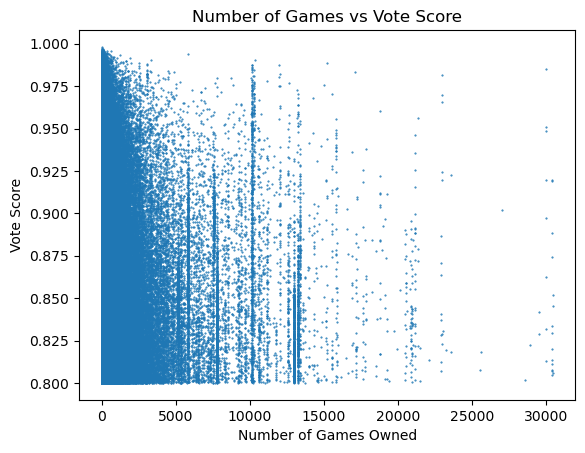

In [9]:
# Plot the number of games the author owns against the Helpfulness Score
plt.plot(df['author_num_games_owned'],df['weighted_vote_score'], '.', markersize = 1)
plt.title('Number of Games vs Vote Score')
plt.xlabel('Number of Games Owned')
plt.ylabel('Vote Score')
plt.show()

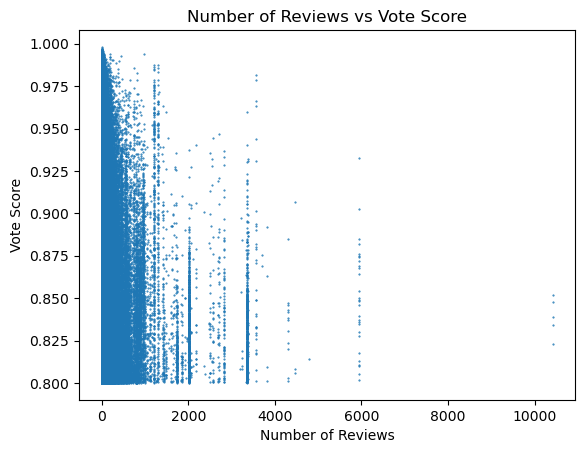

In [10]:
# Plot the number of games the Number of Reviews the review had against the Helpfulness Score
plt.plot(df['author_num_reviews'],df['weighted_vote_score'], '.', markersize = 1)
plt.title('Number of Reviews vs Vote Score')
plt.xlabel('Number of Reviews')
plt.ylabel('Vote Score')
plt.show()

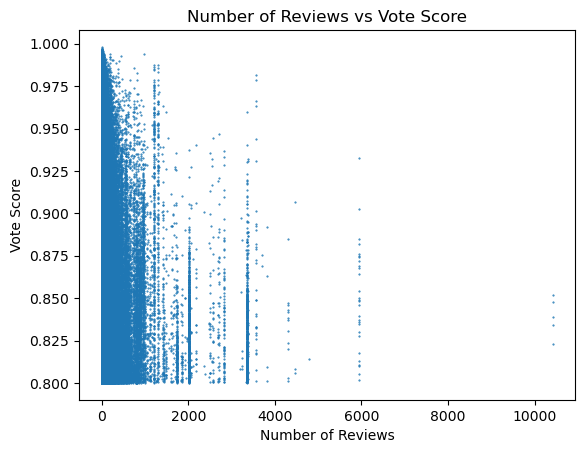

In [11]:
# Plots the numbe of review that the author has made against the helpfulness score
plt.plot(df['author_num_reviews'],df['weighted_vote_score'], '.', markersize = 1)
plt.title('Number of Reviews vs Vote Score')
plt.xlabel('Number of Reviews')
plt.ylabel('Vote Score')
plt.show()